# A MULTI-OBJECTIVE APPROACH FOR PRACTICAL PORTFOLIO OPTIMIZATION PROBLEM

## Install requirements

In [1]:
from IPython.display import clear_output

In [3]:
!pip install yfinance
!pip install fix_yahoo_finance
!pip install pymoo
clear_output()

In [4]:
# Load Packages
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline

## Pull the stock price data

In [6]:
# Import yfinance package
import yfinance as yf

# Set the start and end date
start_date = '2020-04-30' #'2022-04-30'
end_date = '2025-04-30'   #'2025-04-30'

# Set the ticker
# ticker = ['AMZN', 'SPY', 'TSLA', 'FB']


ticker = ['SPY', 'META', 'JCI', 'CMCSA', 'CPB', 'MO', 'MMC', 'JPM',
          'ZION', 'PSA', 'BAX', 'BMY', 'LUV', 'PCAR', 'TXT', 'TMO',
          'DE', 'MSFT', 'HPQ', 'SEE', 'VZ', 'CNP', 'NI', 'T'] #changing fb to meta

# Get the data
data = yf.download(ticker, start_date, end_date, auto_adjust=False) # adding auto_adjust=False to get Adj Close
data

[*********************100%***********************]  24 of 24 completed


Price       Adj Close                                                          \
Ticker            BAX        BMY      CMCSA        CNP        CPB          DE   
Date                                                                            
2010-01-04  23.430401  15.271259   6.142893   8.158977  21.178501   41.695164   
2010-01-05  23.269627  15.032928   6.059635   8.097163  21.216015   41.538975   
2010-01-06  23.350019  15.026969   6.016199   8.018496  20.978418   41.427399   
2010-01-07  23.727859  15.038887   6.142893   8.097163  20.659510   41.724915   
2010-01-08  23.784140  14.788637   6.124793   8.001637  20.528200   42.862858   
...               ...        ...        ...        ...        ...         ...   
2020-12-23  71.700447  51.572659  44.383736  19.224098  41.543655  252.837830   
2020-12-24  72.465225  51.699471  44.685303  19.295631  41.923603  254.036224   
2020-12-28  72.164810  51.674110  45.332790  19.143629  41.819977  252.422607   
2020-12-29  72.838539  51.927750  45.723053  19.045271  41.811352  250.384323   
2020-12-30  72.110153  52.350468  45.421490  19.152569  41.465939  251.870071   

Price                                                    ...    Volume  \
Ticker            HPQ        JCI         JPM        LUV  ...        NI   
Date                                                     ...             
2010-01-04  15.710702  11.910399   28.829182   9.794600  ...   6905603   
2010-01-05  15.776597  11.851291   29.387598  10.311490  ...   8784322   
2010-01-06  15.629824  11.811882   29.549080  10.004862  ...   7382791   
2010-01-07  15.635814  11.897263   30.134399  10.153792  ...   7407223   
2010-01-08  15.752631  11.936670   30.060392   9.926013  ...  15739298   
...               ...        ...         ...        ...  ...       ...   
2020-12-23  21.115330  41.882687  110.911507  44.183647  ...   3564200   
2020-12-24  21.158936  41.891819  110.423782  43.739445  ...   1097800   
2020-12-28  21.167662  42.055992  111.150963  43.588223  ...   2392400   
2020-12-29  20.975780  41.864456  110.858322  43.616585  ...   2639200   
2020-12-30  21.211273  42.338730  111.168701  43.862316  ...   2217400   

Price                                                                          \
Ticker         PCAR      PSA      SEE        SPY         T      TMO       TXT   
Date                                                                            
2010-01-04  3947550  1579100   920400  118944600  38576858  7182800   3630600   
2010-01-05  3448950  1131000   831400  111579900  46650478  3221900  12121100   
2010-01-06  5347500   832400  1334400  116074400  50172450  3065000   5598300   
2010-01-07  3683550  1284100  1394900  131091100  44486797  2638300   5196100   
2010-01-08  3606450  1281100   702900  126402800  36586622  3162200   4104000   
...             ...      ...      ...        ...       ...      ...       ...   
2020-12-23  1427100   720800   917800   46201400  52034656  1241000    722900   
2020-12-24   559500   154600   252800   26457900  25358704   442100    197500   
2020-12-28   880200   569900   344700   39000400  55104218   736500    559800   
2020-12-29  1276350   677400   511800   53680500  48481570   803200    654100   
2020-12-30   842400   559200   413100   49455300  45476487   714800    822100   

Price                           
Ticker            VZ      ZION  
Date                            
2010-01-04  16176648   3974600  
2010-01-05  23722957   5605500  
2010-01-06  37506464  12615200  
2010-01-07  25508242  24716800  
2010-01-08  20658308   6903000  
...              ...       ...  
2020-12-23  14012100    706800  
2020-12-24   7751100    327700  
2020-12-28  15355600    835600  
2020-12-29  15686100   1084100  
2020-12-30  18259800    728400  

[2768 rows x 144 columns]

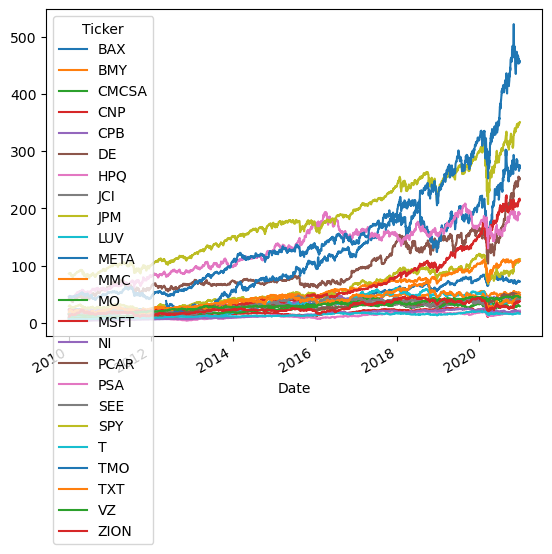

In [7]:
# Plot adjusted close price data
data['Adj Close'].plot()
plt.show()

In [8]:
# Closing price
data = data['Adj Close']
data

Ticker,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,JPM,LUV,...,NI,PCAR,PSA,SEE,SPY,T,TMO,TXT,VZ,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,23.430401,15.271259,6.142893,8.158977,21.178501,41.695164,15.710702,11.910399,28.829182,9.794600,...,3.570034,14.336948,45.894882,16.644493,85.768425,6.965052,45.104332,18.455276,14.213723,10.143891
2010-01-05,23.269627,15.032928,6.059635,8.097163,21.216015,41.538975,15.776597,11.851291,29.387598,10.311490,...,3.560825,14.595411,46.272911,16.470642,85.995468,6.930935,45.256271,18.106348,14.239350,10.501546
2010-01-06,23.350019,15.026969,6.016199,8.018496,20.978418,41.427399,15.629824,11.811882,29.549080,10.004862,...,3.519394,14.787302,45.992256,16.153175,86.056023,6.862848,45.683556,18.736380,13.829910,11.414729
2010-01-07,23.727859,15.038887,6.142893,8.097163,20.659510,41.724915,15.635814,11.897263,30.134399,10.153792,...,3.475661,14.983111,45.929260,16.319469,86.419319,6.785794,45.683556,19.569975,13.747586,12.693179
2010-01-08,23.784140,14.788637,6.124793,8.001637,20.528200,42.862858,15.752631,11.936670,30.060392,9.926013,...,3.457246,15.002692,45.093029,16.387499,86.706871,6.736080,46.452713,19.754129,13.756254,12.487710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23,71.700447,51.572659,44.383736,19.224098,41.543655,252.837830,21.115330,41.882687,110.911507,44.183647,...,18.737026,48.176769,188.971954,42.785839,346.106049,15.838113,453.576874,48.084175,45.166378,37.638355
2020-12-24,72.465225,51.699471,44.685303,19.295631,41.923603,254.036224,21.158936,41.891819,110.423782,43.739445,...,18.890957,48.754280,190.512024,42.656296,347.452484,15.805058,453.329437,47.845299,45.074455,37.491287
2020-12-28,72.164810,51.674110,45.332790,19.143629,41.819977,252.422607,21.167662,42.055992,111.150963,43.588223,...,19.070543,48.454201,190.753433,42.128876,350.437439,15.727937,455.942047,47.477024,45.181709,37.508591


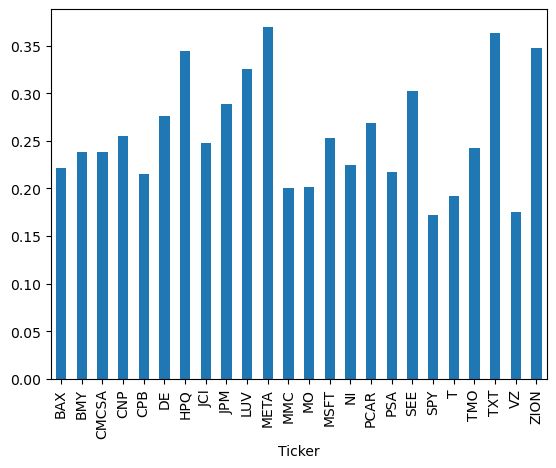

In [9]:
# Volatility of stocks
data.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250)).plot(kind='bar')
plt.show()  # Explicitly render the plot

## Process on all dataset


In [11]:
# Log of percentage change
cov_matrix = data.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

Ticker,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,JPM,LUV,...,NI,PCAR,PSA,SEE,SPY,T,TMO,TXT,VZ,ZION
Ticker,,,,,,,,,,,,,,,,,,,,,
BAX,0.000196,0.000077,0.000084,0.000088,0.000051,0.000100,0.000104,0.000085,0.000115,0.000091,...,0.000080,0.000103,0.000071,0.000085,0.000094,0.000068,0.000117,0.000124,0.000059,0.000113
BMY,0.000077,0.000227,0.000077,0.000080,0.000045,0.000084,0.000084,0.000079,0.000100,0.000083,...,0.000068,0.000089,0.000060,0.000093,0.000083,0.000059,0.000096,0.000112,0.000049,0.000095
CMCSA,0.000084,0.000077,0.000227,0.000101,0.000052,0.000122,0.000125,0.000115,0.000155,0.000132,...,0.000091,0.000131,0.000081,0.000114,0.000113,0.000096,0.000101,0.000171,0.000076,0.000154
CNP,0.000088,0.000080,0.000101,0.000261,0.000064,0.000123,0.000127,0.000114,0.000145,0.000127,...,0.000161,0.000111,0.000107,0.000129,0.000109,0.000093,0.000088,0.000171,0.000074,0.000136
CPB,0.000051,0.000045,0.000052,0.000064,0.000185,0.000042,0.000045,0.000056,0.000055,0.000045,...,0.000066,0.000055,0.000063,0.000053,0.000053,0.000051,0.000056,0.000061,0.000052,0.000043
DE,0.000100,0.000084,0.000122,0.000123,0.000042,0.000304,0.000173,0.000146,0.000185,0.000148,...,0.000093,0.000186,0.000095,0.000154,0.000134,0.000097,0.000124,0.000234,0.000073,0.000194
HPQ,0.000104,0.000084,0.000125,0.000127,0.000045,0.000173,0.000476,0.000148,0.000192,0.000166,...,0.000099,0.000165,0.000083,0.000170,0.000141,0.000099,0.000123,0.000221,0.000072,0.000198
JCI,0.000085,0.000079,0.000115,0.000114,0.000056,0.000146,0.000148,0.000246,0.000166,0.000144,...,0.000087,0.000156,0.000086,0.000139,0.000116,0.000087,0.000111,0.000210,0.000062,0.000175
JPM,0.000115,0.000100,0.000155,0.000145,0.000055,0.000185,0.000192,0.000166,0.000333,0.000197,...,0.000106,0.000194,0.000104,0.000179,0.000156,0.000116,0.000136,0.000265,0.000084,0.000300


In [12]:
# Yearly returns for individual companies
ind_er = data.resample('Y').last().pct_change().mean()
ind_er

C:\Users\kaomi\AppData\Local\Temp\ipykernel_14544\1202306265.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = data.resample('Y').last().pct_change().mean()


Ticker
BAX      0.144051
BMY      0.147523
CMCSA    0.204940
CNP      0.091590
CPB      0.086927
DE       0.171143
HPQ      0.135077
JCI      0.144756
JPM      0.166374
LUV      0.225511
META     0.386035
MMC      0.189381
MO       0.125360
MSFT     0.272059
NI       0.174165
PCAR     0.112969
PSA      0.132175
SEE      0.123915
SPY      0.142983
T        0.091712
TMO      0.268139
TXT      0.096359
VZ       0.101645
ZION     0.109554
dtype: float64

In [13]:
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
ann_sd = data.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

Ticker
BAX      0.221079
BMY      0.238380
CMCSA    0.238482
CNP      0.255243
CPB      0.215139
DE       0.275749
HPQ      0.344949
JCI      0.247854
JPM      0.288485
LUV      0.325350
META     0.369997
MMC      0.200237
MO       0.201687
MSFT     0.252980
NI       0.225033
PCAR     0.268955
PSA      0.217273
SEE      0.302209
SPY      0.172518
T        0.192174
TMO      0.242626
TXT      0.363001
VZ       0.174974
ZION     0.347862
dtype: float64

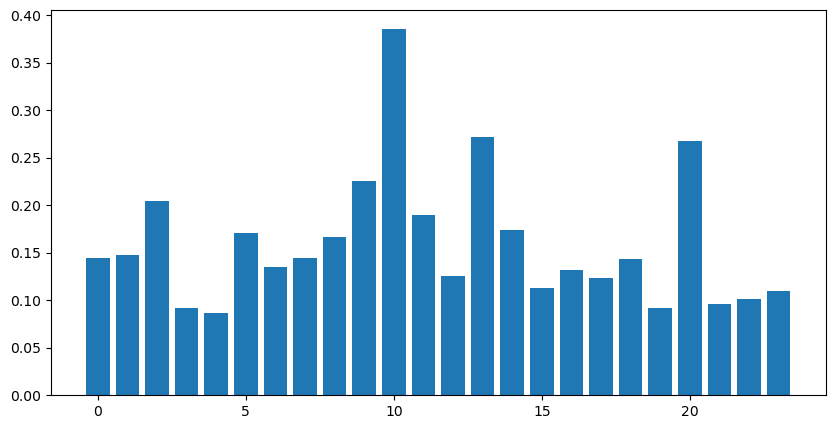

DONE


In [14]:
mu = np.array(ind_er)
cov = np.array(cov_matrix)

corr_matrix = data.pct_change().apply(lambda x: np.log(1+x)).corr()
labels = data.columns

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 5))
k = np.arange(len(mu))
ax.bar(k, mu)
plt.show()


f = plt.figure(figsize=(10, 10))
plt.matshow(corr_matrix, fignum=f.number)
plt.xticks(k, labels, fontsize=12, rotation=90)
plt.yticks(k, labels, fontsize=12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)
print("DONE")

## Solve problem with NSGA_II

In [78]:
# import libs
from pymoo.core.problem import ElementwiseProblem
from pymoo.core.repair import Repair
from pymoo.algorithms.moo.sms import SMSEMOA
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
import operator

In [80]:
class PortfolioProblem(ElementwiseProblem):

    def __init__(self, mu, cov, risk_free_rate=0.02, **kwargs):
        super().__init__(n_var=len(np.array(ticker)), n_obj=2, xl=0.0, xu=1.0, **kwargs)
        self.mu = mu
        self.cov = cov
        self.risk_free_rate = risk_free_rate

    def _evaluate(self, x, out, *args, **kwargs):
        exp_return = x @ self.mu
        exp_risk = np.sqrt(x.T @ self.cov @ x) * np.sqrt(250.0)
        # ff1 = exp_return*0.1 - exp_risk*0.1
        # ff2 = exp_return*exp_return*0.1 - exp_risk*0.1
        sharpe = (exp_return - self.risk_free_rate) / exp_risk

        # diversity (using entropy to measure)
        # diversity = -np.sum(x * np.log(x + 1e-10))

        out["F"] = [exp_risk, -exp_return]
        out["sharpe"] = sharpe

In [82]:
class PortfolioRepair(Repair):

    def _do(self, problem, X, **kwargs):
        X[X < 1e-3] = 0
        return X / X.sum(axis=1, keepdims=True)

In [104]:
'''

# for crossover 
from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.crossover.pntx import PointCrossover, SinglePointCrossover, TwoPointCrossover
from pymoo.operators.crossover.expx import ExponentialCrossover
from pymoo.operators.crossover.ux import UniformCrossover
from pymoo.operators.crossover.hux import HalfUniformCrossover

# for selection
# it seems that we can't set selection here
from pymoo.operators.sampling.rnd import FloatRandomSampling
from pymoo.operators.sampling.rnd import BinaryRandomSampling
from pymoo.operators.sampling.lhs import LHS

# Adding configure 
configurations = [
    # BinaryRandomSampling
    {
        'name': 'BinaryRandomSampling_SBX',
        'sampling': BinaryRandomSampling(),
        'crossover': SBX(),  # Default SBX parameters
    },
     {
        'name': 'BinaryRandomSampling_SinglePtXO',
         'sampling': BinaryRandomSampling(),
        'crossover': SinglePointCrossover(),  # More aggressive crossover
    },
    {
        'name': 'BinaryRandomSampling_TwoPtXO',
        'sampling': BinaryRandomSampling(),
        'crossover': TwoPointCrossover(),
    },
    
    {
        'name': 'BinaryRandomSampling_UnifXO',
        'sampling': BinaryRandomSampling(),
        'crossover': UniformCrossover(),
    },
    {
        'name': 'BinaryRandomSampling_HalfUnifXO',
        'sampling': BinaryRandomSampling(),
        'crossover': HalfUniformCrossover(),
    },

    # FloatRandomSampling
    {
        'name': 'FloatRandomSampling_SBX',
        'sampling': FloatRandomSampling(),
        'crossover': SBX(),  # Default SBX parameters
    },
     {
        'name': 'FloatRandomSampling_SinglePtXO',
         'sampling': FloatRandomSampling(),
        'crossover': SinglePointCrossover(),  # More aggressive crossover
    },
    {
        'name': 'FloatRandomSampling_TwoPtXO',
        'sampling': FloatRandomSampling(),
        'crossover': TwoPointCrossover(),
    },
    {
        'name': 'FloatRandomSampling_ExpXO',
        'sampling': FloatRandomSampling(),
        'crossover': ExponentialCrossover(),
    },
    {
        'name': 'FloatRandomSampling_UnifXO',
        'sampling': FloatRandomSampling(),
        'crossover': UniformCrossover(),
    },
    {
        'name': 'FloatRandomSampling_HalfUnifXO',
        'sampling': FloatRandomSampling(),
        'crossover': HalfUniformCrossover(),
    },
    
    # LHS
    {
        'name': 'LHS_SBX',
        'sampling': LHS(),
        'crossover': SBX(),  # Default SBX parameters
    },
     {
        'name': 'LHS_SinglePtXO',
         'sampling': LHS(),
        'crossover': SinglePointCrossover(),  # More aggressive crossover
    },
    {
        'name': 'LHS_TwoPtXO',
        'sampling': LHS(),
        'crossover': TwoPointCrossover(),
    },
    {
        'name': 'LHS_ExpXO',
        'sampling': LHS(),
        'crossover': ExponentialCrossover(),
    },
    {
        'name': 'LHS_UnifXO',
        'sampling': LHS(),
        'crossover': UniformCrossover(),
    },
    {
        'name': 'LHS_HalfUnifXO',
        'sampling': LHS(),
        'crossover': HalfUniformCrossover(),
    },
]
'''

''' we ignore
{
        'name': 'BinaryRandomSamplingn_ExpXO',
        'sampling': BinaryRandomSampling(),
        'crossover': ExponentialCrossover(),
    },
'''

'''
# Store results 
results = {}

'''

## Needed function 

In [ ]:
def calculate_expected_returns(current_data):
    ind_er = data.resample('Y').last().pct_change().mean()
    return ind_er

def calculate_covariance_matrix(current_data):
    cov_matrix = current_data.pct_change().apply(lambda x: np.log(1+x)).cov()
    return cov_matrix
    
def execute_trades(final_weights):
    print(final_weights)
    

In [106]:
'''
%%time
for config in configurations:
    print(f"\nRunning configuration: {config['name']}")
'''

results = {}
portfolio_history = []

for day in range(250):
    current_data = stock_data.iloc[:day] if day > 0 else stock_data.iloc[0:1]
    mu = calculate_expected_returns(current_data)
    cov = calculate_covariance_matrix(current_data)
    problem = PortfolioProblem(mu, cov)
    
    '''
    algorithm = NSGA2(repair=PortfolioRepair(),
                      sampling = config['sampling'],
                      crossover=config['crossover'])
    '''
    
    algorithm = NSGA2(repair=PortfolioRepair())
    

    res = minimize(problem,
                   algorithm,
                   seed=1,
                   verbose=False)

    # adding the result
    results[config['name']] = res

    # Get optimal portfolio weights
    X, F, sharpe = res.opt.get("X", "F", "sharpe")
    F = F * [1, -1]  # Adjust for minimization/maximization
    
    # Select portfolio with maximum Sharpe ratio
    max_sharpe_idx = sharpe.argmax()
    optimal_weights = X[max_sharpe_idx]

    '''
    # Add other indicators (f1, ..., fk) for daily allocation
    additional_indicators = calculate_technical_indicators(current_data)  # Assume this function exists
    final_weights = adjust_weights_with_indicators(optimal_weights, additional_indicators)
    '''
    
    # Make investment with adjusted weights
    daily_return = execute_trades(optimal_weights)  # Assume this function exists
    portfolio_history.append(daily_return)
    
    # Check if we've reached the end date (d = dend?)
    if day == 249: 
        # Calculate final returns
        total_return = calculate_final_return(portfolio_history)
        print(f"Investment period completed. Total return: {total_return:.2f}%")
        break



Running configuration: BinaryRandomSampling_SBX
Completed BinaryRandomSampling_SBX

Running configuration: BinaryRandomSampling_SinglePtXO
Completed BinaryRandomSampling_SinglePtXO

Running configuration: BinaryRandomSampling_TwoPtXO
Completed BinaryRandomSampling_TwoPtXO

Running configuration: BinaryRandomSampling_UnifXO
Completed BinaryRandomSampling_UnifXO

Running configuration: BinaryRandomSampling_HalfUnifXO
Completed BinaryRandomSampling_HalfUnifXO

Running configuration: FloatRandomSampling_SBX
Completed FloatRandomSampling_SBX

Running configuration: FloatRandomSampling_SinglePtXO
Completed FloatRandomSampling_SinglePtXO

Running configuration: FloatRandomSampling_TwoPtXO
Completed FloatRandomSampling_TwoPtXO

Running configuration: FloatRandomSampling_ExpXO
Completed FloatRandomSampling_ExpXO

Running configuration: FloatRandomSampling_UnifXO
Completed FloatRandomSampling_UnifXO

Running configuration: FloatRandomSampling_HalfUnifXO
Completed FloatRandomSampling_HalfUnifXO


In [108]:
# Compare results
for name, res in results.items():
    print(f"\nThe result of {name} is as follows\n")
    X, F, sharpe = res.opt.get("X", "F", "sharpe")
    F = F * [1, -1]
    max_sharpe = sharpe.argmax()

    '''
    # equal weights
    x = np.zeros((len(ticker), 1))
    x = x + 1.0/len(x)

    plt.scatter(F[:, 0], F[:, 1], facecolor="none", edgecolors="blue", alpha=0.5, label="Pareto-Optimal Portfolio")
    plt.scatter(cov.diagonal() ** 0.5 * np.sqrt(250.0), mu, facecolor="none", edgecolors="black", s=30, label="Asset")
    plt.scatter(F[max_sharpe, 0], F[max_sharpe, 1], marker="x", s=100, color="red", label="Max Sharpe Portfolio")
    plt.scatter(np.sqrt(x.T @ cov @ x) * np.sqrt(250.0), x.T @ mu, marker="*", s=100, color="green", label="Equal weights")
    plt.legend()
    plt.xlabel("expected volatility")
    plt.ylabel("expected return")
    plt.show()

    plt.scatter(F[:, 0], F[:, 1], facecolor="none", edgecolors="blue", alpha=0.5, label="Pareto-Optimal Portfolio")
    plt.scatter(F[max_sharpe, 0], F[max_sharpe, 1], marker="x", s=100, color="red", label="Max Sharpe Portfolio")
    plt.legend()
    plt.xlabel("expected volatility")
    plt.ylabel("expected return")
    plt.show()
    '''
    x = X[max_sharpe].T

    print("Best Sharpe: \nReturn     = ", x.T @ mu)
    print("Volatility = ", np.sqrt(x.T @ cov @ x) * np.sqrt(250.0))
    print("sharpo ratio = ", (x.T @ mu - 0.02)/(np.sqrt(x.T @ cov @ x) * np.sqrt(250.0)))



The result of BinaryRandomSampling_SBX is as follows

Best Sharpe: 
Return     =  0.2731125164004499
Volatility =  0.19517656583658918
sharpo ratio =  1.2968386615243932

The result of BinaryRandomSampling_SinglePtXO is as follows

Best Sharpe: 
Return     =  0.2807073809141498
Volatility =  0.2009808806473707
sharpo ratio =  1.2971750351296933

The result of BinaryRandomSampling_TwoPtXO is as follows

Best Sharpe: 
Return     =  0.28212500316492645
Volatility =  0.2027033809052396
sharpo ratio =  1.2931456890078485

The result of BinaryRandomSampling_UnifXO is as follows

Best Sharpe: 
Return     =  0.27750449277591827
Volatility =  0.19836313126945382
sharpo ratio =  1.2981469445858242

The result of BinaryRandomSampling_HalfUnifXO is as follows

Best Sharpe: 
Return     =  0.2825320459716741
Volatility =  0.20228141128183158
sharpo ratio =  1.297855518745108

The result of FloatRandomSampling_SBX is as follows

Best Sharpe: 
Return     =  0.28118024369474437
Volatility =  0.2011749

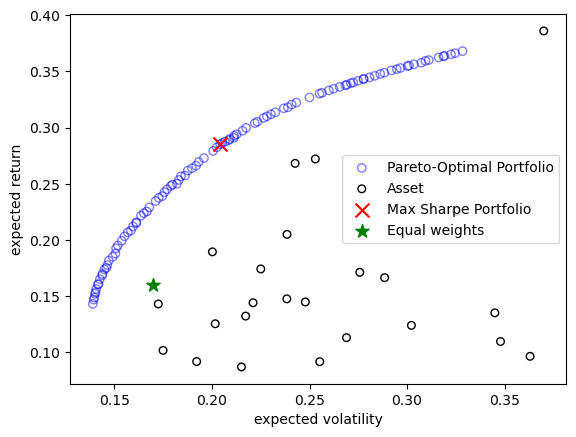

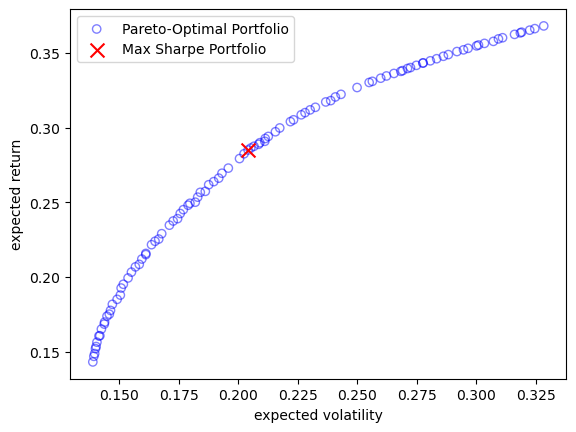

In [52]:
X, F, sharpe = res.opt.get("X", "F", "sharpe")
F = F * [1, -1]
max_sharpe = sharpe.argmax()

# equal weights
x = np.zeros((len(ticker), 1))
x = x + 1.0/len(x)

plt.scatter(F[:, 0], F[:, 1], facecolor="none", edgecolors="blue", alpha=0.5, label="Pareto-Optimal Portfolio")
plt.scatter(cov.diagonal() ** 0.5 * np.sqrt(250.0), mu, facecolor="none", edgecolors="black", s=30, label="Asset")
plt.scatter(F[max_sharpe, 0], F[max_sharpe, 1], marker="x", s=100, color="red", label="Max Sharpe Portfolio")
plt.scatter(np.sqrt(x.T @ cov @ x) * np.sqrt(250.0), x.T @ mu, marker="*", s=100, color="green", label="Equal weights")
plt.legend()
plt.xlabel("expected volatility")
plt.ylabel("expected return")
plt.show()

plt.scatter(F[:, 0], F[:, 1], facecolor="none", edgecolors="blue", alpha=0.5, label="Pareto-Optimal Portfolio")
plt.scatter(F[max_sharpe, 0], F[max_sharpe, 1], marker="x", s=100, color="red", label="Max Sharpe Portfolio")
plt.legend()
plt.xlabel("expected volatility")
plt.ylabel("expected return")
plt.show()

In [54]:
allocation = {name: w for name, w in zip(data.columns, X[max_sharpe])}
allocation = sorted(allocation.items(), key=operator.itemgetter(1), reverse=True)

print("Allocation With Best Sharpe")
for name, w in allocation:
    print(f"{name:<5} {w}")

Allocation With Best Sharpe
TMO   0.32297696275160204
META  0.27453075912247143
MSFT  0.1774543857862301
NI    0.10187217354534035
CMCSA 0.06870700223721722
LUV   0.05445871655713892
BAX   0.0
BMY   0.0
CNP   0.0
CPB   0.0
DE    0.0
HPQ   0.0
JCI   0.0
JPM   0.0
MMC   0.0
MO    0.0
PCAR  0.0
PSA   0.0
SEE   0.0
SPY   0.0
T     0.0
TXT   0.0
VZ    0.0
ZION  0.0


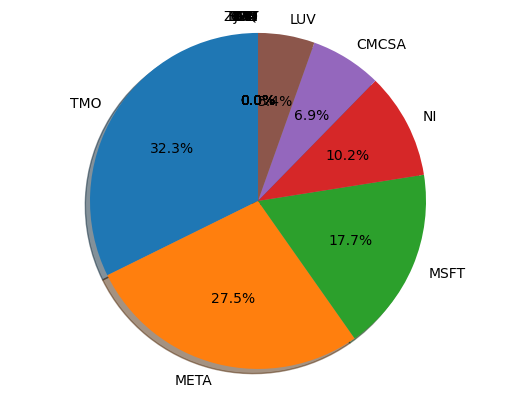

In [56]:
for al in allocation:
    if al[1] <= 1e-2:
        allocation.remove(al)

col_name = []
w1 = []
for name, w in allocation:
    col_name.append(name)
    w1.append(w)
    
fig1, ax1 = plt.subplots()
ax1.pie(w1, labels=col_name, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [191]:
x = np.zeros((len(ticker), 1))
x = x + 1.0/len(x)

print("For equal weights: \nReturn     = ", (x.T @ mu)[0])
print("Volatility = ", (np.sqrt(x.T @ cov @ x) * np.sqrt(250.0))[0][0])

For equal weights: 
Return     =  0.0933490427723025
Volatility =  0.16460265032746366


In [193]:
x = X[max_sharpe].T

print("Best Sharpe: \nReturn     = ", x.T @ mu)
print("Volatility = ", np.sqrt(x.T @ cov @ x) * np.sqrt(250.0))

Best Sharpe: 
Return     =  0.019924009576235042
Volatility =  0.48197988245737083


# Solve problem with NSGA_II and multi_object

In [121]:
# import libs
from pymoo.core.problem import ElementwiseProblem
from pymoo.core.repair import Repair
from pymoo.algorithms.moo.sms import SMSEMOA
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
import operator

In [ ]:
class PortfolioProblem(ElementwiseProblem):

    def __init__(self, mu, cov, risk_free_rate=0.02, **kwargs):
        super().__init__(n_var=len(np.array(ticker)), n_obj=2, xl=0.0, xu=1.0, **kwargs)
        self.mu = mu
        self.cov = cov
        self.risk_free_rate = risk_free_rate

    def _evaluate(self, x, out, *args, **kwargs):
        exp_return = x @ self.mu
        exp_risk = np.sqrt(x.T @ self.cov @ x) * np.sqrt(250.0)
        sharpe = (exp_return - self.risk_free_rate) / exp_risk

        # diversity (using entropy to measure)
        # diversity = -np.sum(x * np.log(x + 1e-10))

        out["F"] = [exp_risk, -exp_return]
        out["sharpe"] = sharpe

## Solve problem with SMS-EMOA

In [54]:
class PortfolioProblem(ElementwiseProblem):

    def __init__(self, mu, cov, risk_free_rate=0.02, **kwargs):
        super().__init__(n_var=len(np.array(ticker)), n_obj=2, xl=0.0, xu=1.0, **kwargs)
        self.mu = mu
        self.cov = cov
        self.risk_free_rate = risk_free_rate

    def _evaluate(self, x, out, *args, **kwargs):
        exp_return = x @ self.mu
        exp_risk = np.sqrt(x.T @ self.cov @ x) * np.sqrt(250.0)
        sharpe = (exp_return - self.risk_free_rate) / exp_risk

        out["F"] = [exp_risk, -exp_return]
        out["sharpe"] = sharpe

In [56]:
class PortfolioRepair(Repair):

    def _do(self, problem, X, **kwargs):
        X[X < 1e-3] = 0
        return X / X.sum(axis=1, keepdims=True)

In [58]:
%%time
problem = PortfolioProblem(mu, cov)

algorithm = SMSEMOA(repair=PortfolioRepair())

res = minimize(problem,
               algorithm,
               seed=1,
               verbose=False)

CPU times: total: 4.48 s
Wall time: 4.51 s


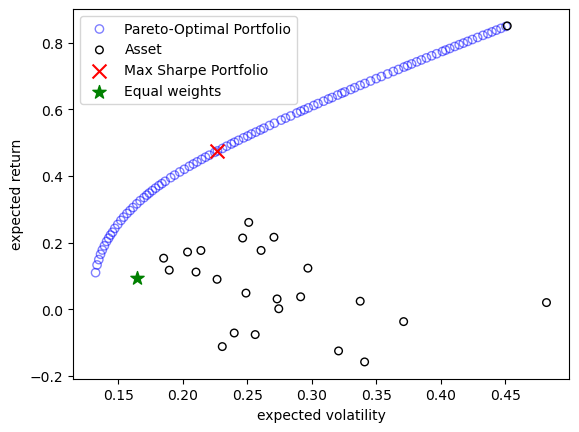

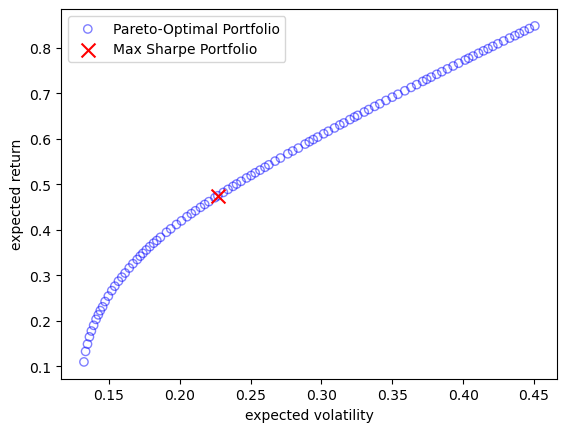

In [59]:
X, F, sharpe = res.opt.get("X", "F", "sharpe")
F = F * [1, -1]
max_sharpe = sharpe.argmax()

# equal weights
x = np.zeros((len(ticker), 1))
x = x + 1.0/len(x)

plt.scatter(F[:, 0], F[:, 1], facecolor="none", edgecolors="blue", alpha=0.5, label="Pareto-Optimal Portfolio")
plt.scatter(cov.diagonal() ** 0.5 * np.sqrt(250.0), mu, facecolor="none", edgecolors="black", s=30, label="Asset")
plt.scatter(F[max_sharpe, 0], F[max_sharpe, 1], marker="x", s=100, color="red", label="Max Sharpe Portfolio")
plt.scatter(np.sqrt(x.T @ cov @ x) * np.sqrt(250.0), x.T @ mu, marker="*", s=100, color="green", label="Equal weights")
plt.legend()
plt.xlabel("expected volatility")
plt.ylabel("expected return")
plt.show()

plt.scatter(F[:, 0], F[:, 1], facecolor="none", edgecolors="blue", alpha=0.5, label="Pareto-Optimal Portfolio")
plt.scatter(F[max_sharpe, 0], F[max_sharpe, 1], marker="x", s=100, color="red", label="Max Sharpe Portfolio")
plt.legend()
plt.xlabel("expected volatility")
plt.ylabel("expected return")
plt.show()

In [60]:
allocation = {name: w for name, w in zip(data.columns, X[max_sharpe])}
allocation = sorted(allocation.items(), key=operator.itemgetter(1), reverse=True)

print("Allocation With Best Sharpe")
for name, w in allocation:
    print(f"{name:<5} {w}")

Allocation With Best Sharpe
META  0.4283802127001904
MO    0.24717412321684126
T     0.17433582082474103
NI    0.09308526424121474
JPM   0.0570245790170126
BAX   0.0
BMY   0.0
CMCSA 0.0
CNP   0.0
CPB   0.0
DE    0.0
HPQ   0.0
JCI   0.0
LUV   0.0
MMC   0.0
MSFT  0.0
PCAR  0.0
PSA   0.0
SEE   0.0
SPY   0.0
TMO   0.0
TXT   0.0
VZ    0.0
ZION  0.0


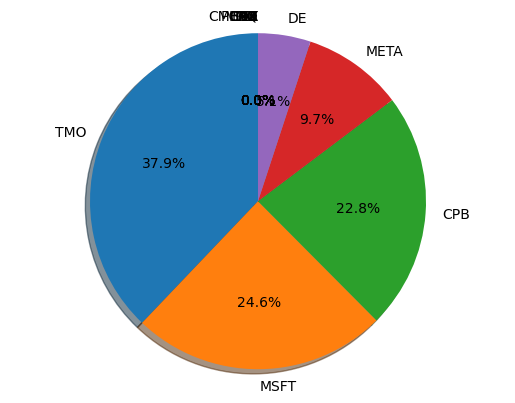

In [87]:
for al in allocation:
    if al[1] <= 1e-2:
        allocation.remove(al)

col_name = []
w1 = []
for name, w in allocation:
    col_name.append(name)
    w1.append(w)
    
fig1, ax1 = plt.subplots()
ax1.pie(w1, labels=col_name, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [89]:
x = np.zeros((len(ticker), 1))
x = x + 1.0/len(x)

print("For equal weights: \nReturn     = ", (x.T @ mu)[0])
print("Volatility = ", (np.sqrt(x.T @ cov @ x) * np.sqrt(250.0))[0][0])

For equal weights: 
Return     =  0.18414071533539172
Volatility =  0.22009098632369006


In [91]:
x = X[max_sharpe].T

print("Best Sharpe: \nReturn     = ", x.T @ mu)
print("Volatility = ", np.sqrt(x.T @ cov @ x) * np.sqrt(250.0))

Best Sharpe: 
Return     =  0.41356283983338016
Volatility =  0.23119339384867044


In [ ]:
# To export jupyter notebook to html, save your notebook and run this cell
!jupyter nbconvert --to html Project_codes.ipynb

# Solve problem with MOEA/D

In [110]:
from pymoo.core.problem import ElementwiseProblem
from pymoo.core.repair import Repair
from pymoo.optimize import minimize
from pymoo.algorithms.moo.moead import MOEAD
from pymoo.util.ref_dirs import get_reference_directions
import numpy as np
import matplotlib.pyplot as plt
import operator

class PortfolioProblem(ElementwiseProblem):

    def __init__(self, mu, cov, risk_free_rate=0.02, **kwargs):
        n_assets = len(mu)
        super().__init__(n_var=n_assets, n_obj=2, xl=0.0, xu=1.0, **kwargs)
        self.mu = mu
        self.cov = cov
        self.risk_free_rate = risk_free_rate

    def _evaluate(self, x, out, *args, **kwargs):
        exp_return = x @ self.mu
        exp_risk = np.sqrt(x.T @ self.cov @ x) * np.sqrt(250.0)
        sharpe = (exp_return - self.risk_free_rate) / exp_risk

        out["F"] = [exp_risk, -exp_return]
        out["sharpe"] = sharpe

class PortfolioRepair(Repair):

    def _do(self, problem, X, **kwargs):
        X[X < 1e-3] = 0
        return X / X.sum(axis=1, keepdims=True)

# Problem definition
problem = PortfolioProblem(mu, cov)

# MOEAD Algorithm
ref_dirs = get_reference_directions("uniform", 2, n_partitions=12)

algorithm = MOEAD(
    ref_dirs,
    n_neighbors=15,
    prob_neighbor_mating=0.7,
)

# Run optimization
res = minimize(problem,
               algorithm,
               ('n_gen', 200),
               seed=1,
               verbose=False)

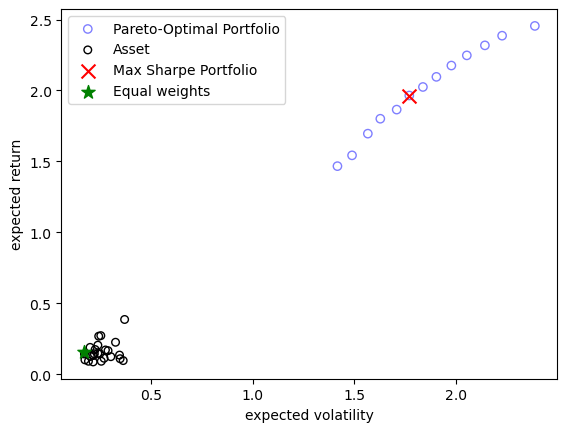

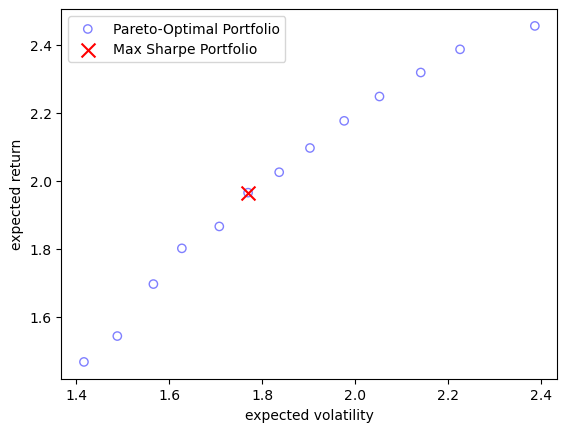

In [112]:
# Extract results
X, F, sharpe = res.opt.get("X", "F", "sharpe")
F = F * [1, -1]  # Invert return back to positive
max_sharpe = sharpe.argmax()

# Equal weights portfolio
x = np.ones(len(mu)) / len(mu)

# Plot results
plt.scatter(F[:, 0], F[:, 1], facecolor="none", edgecolors="blue", alpha=0.5, label="Pareto-Optimal Portfolio")
plt.scatter(np.sqrt(np.diag(cov)) * np.sqrt(250.0), mu, facecolor="none", edgecolors="black", s=30, label="Asset")
plt.scatter(F[max_sharpe, 0], F[max_sharpe, 1], marker="x", s=100, color="red", label="Max Sharpe Portfolio")
plt.scatter(np.sqrt(x.T @ cov @ x) * np.sqrt(250.0), x.T @ mu, marker="*", s=100, color="green", label="Equal weights")
plt.legend()
plt.xlabel("expected volatility")
plt.ylabel("expected return")
plt.show()

plt.scatter(F[:, 0], F[:, 1], facecolor="none", edgecolors="blue", alpha=0.5, label="Pareto-Optimal Portfolio")
plt.scatter(F[max_sharpe, 0], F[max_sharpe, 1], marker="x", s=100, color="red", label="Max Sharpe Portfolio")
plt.legend()
plt.xlabel("expected volatility")
plt.ylabel("expected return")
plt.show()

In [38]:
x = X[max_sharpe].T

print("Best Sharpe: \nReturn     = ", x.T @ mu)
print("Volatility = ", np.sqrt(x.T @ cov @ x) * np.sqrt(250.0))

Best Sharpe: 
Return     =  1.9644809221279909
Volatility =  1.7699252006561448
